# 数理手法Ⅶ 時系列解析 第1回 レポート
#### 計数工学科 数理情報工学コース 3年
#### 学生証番号: XX-XXXXXX 氏名: 佐藤 瞭
#### 連絡先: XXX

---

ライブラリのインストール・インポート

In [1]:
# packages <- c('TTR', 'timsac', 'TSSS')
# install.packages(packages)
#library('TTR')
#library('timsac')
library('TSSS')

---

# 1

## (a)

興味を持った事象:  
仮想通貨の価格の推移。2018年初期のピークと比べれば現在の価値は下がっているが、2019年05月17日現在も価格の変動は続いており、うまく取引すれば大きな利益を得ることができると考えた。  

※講義で日経平均株価のデータが紹介されていたが、仮想通貨の価格変動の要因は日経平均株価の変動要因とは必ずしも一致しないと考え、仮想通貨の価格変動の解析から得られる結論は、日経平均株価の解析から得られる結論とは必ずしも一致しないと考えた。

## (b)

分析の目的:  
仮想通貨の価格の推移を予測すること。仮想通貨の取引で利益を得るためには売買のタイミングを適切に決定することが必要であり、未来の価格推移の予測が必要である。

## (c)

データ分析の観点として以下のような点が考えられる。  
- 周期性がないかどうか。
- 価格変動を与える潜在的なモデルの変化点はないか。あるとしたらどこか。(時間軸をいくつかの(できるだけ荒い)区間に分割して、各区間で、それぞれ別の確率分布で強定常性が成り立つようにできないか調べればよいだろうか。)
- 仮想通貨と関連する出来事(取引所がハッキング被害を受ける等)とその後の価格変動にはどのような関係があるか。
- 移動平均、ロウソク足、ボリンジャーバンドなどのテクニカル指標は予測精度をどれくらい向上させるか。


---

# 2

## (a)

データは https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20170101&end=20181231 から取得した。今回は、2017年01月01日から2018年12月31日まで2年分のBitcoinのUSドル価格の、日毎の終値を対象とした。  
次の図は、データをそのままプロットしたものである。

In [2]:
data <- read.csv('btc_usd.csv')[['Close']]

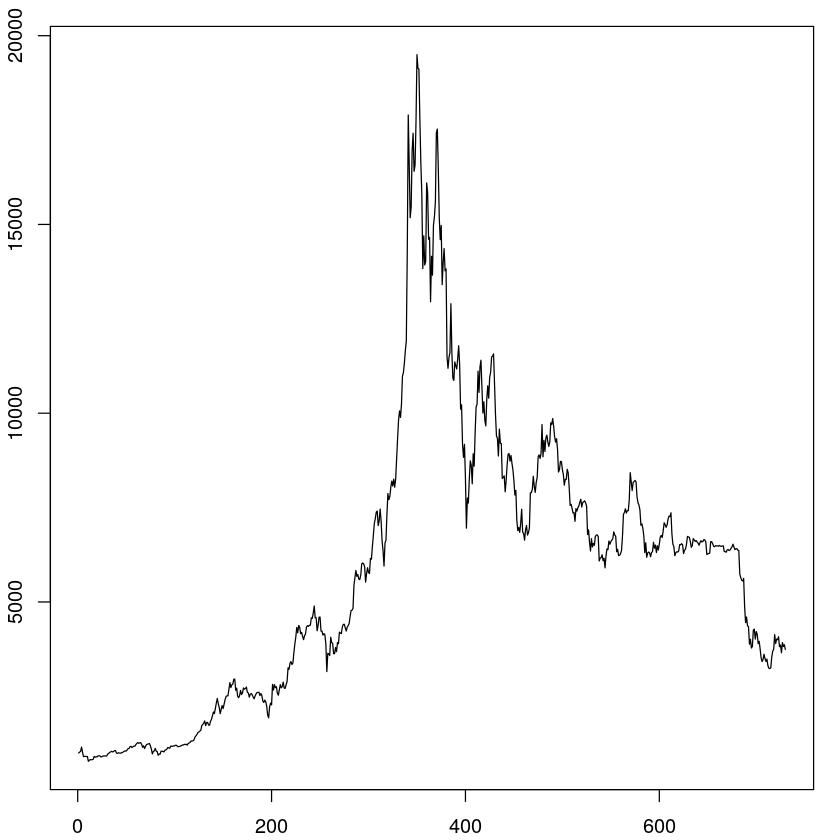

In [3]:
par(mar=c(2,2,1,1)+0.1)
plot(data, type='l')

## (b)

平均も分散も定常ではないので、このデータは定常とはいえないと判断した。

## (c)

定常化のための前処理として、対数の1階差分を選択した。前処理後のデータのグラフを以下に示す。

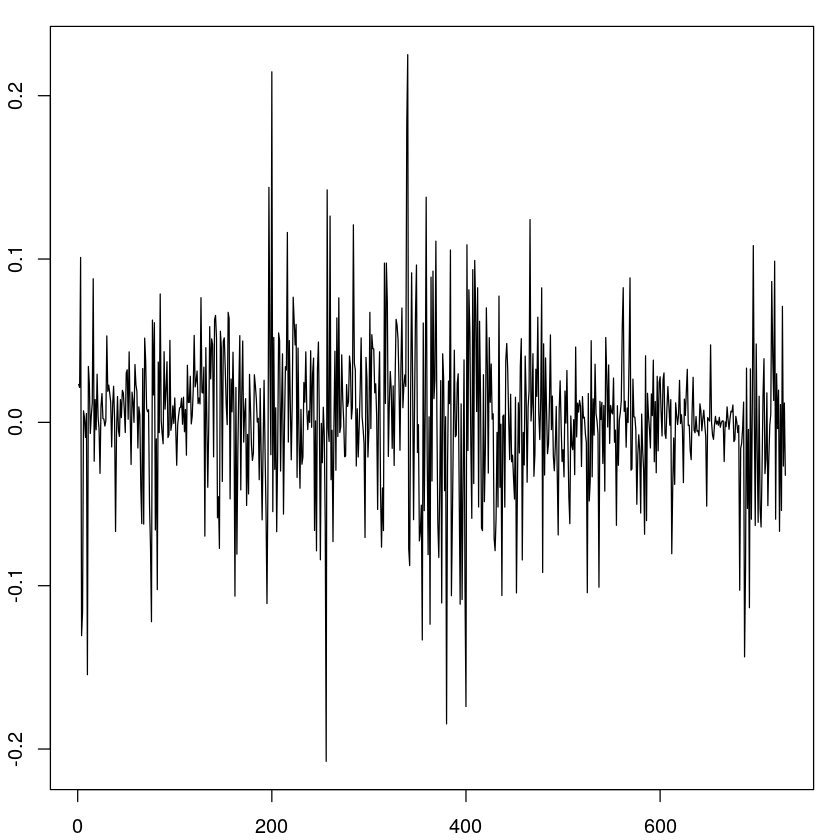

In [4]:
par(mar=c(2,2,1,1)+0.1)
plot(diff(log(data), lag=1, differences=1), type='l')

対数の1階差分をとる前処理により、平均定常になったように考えられる。

---

# 3

## (a)

In [5]:
data_steady <- diff(log(data), lag=1, differences=1)

自己共分散関数を次の図に示す。

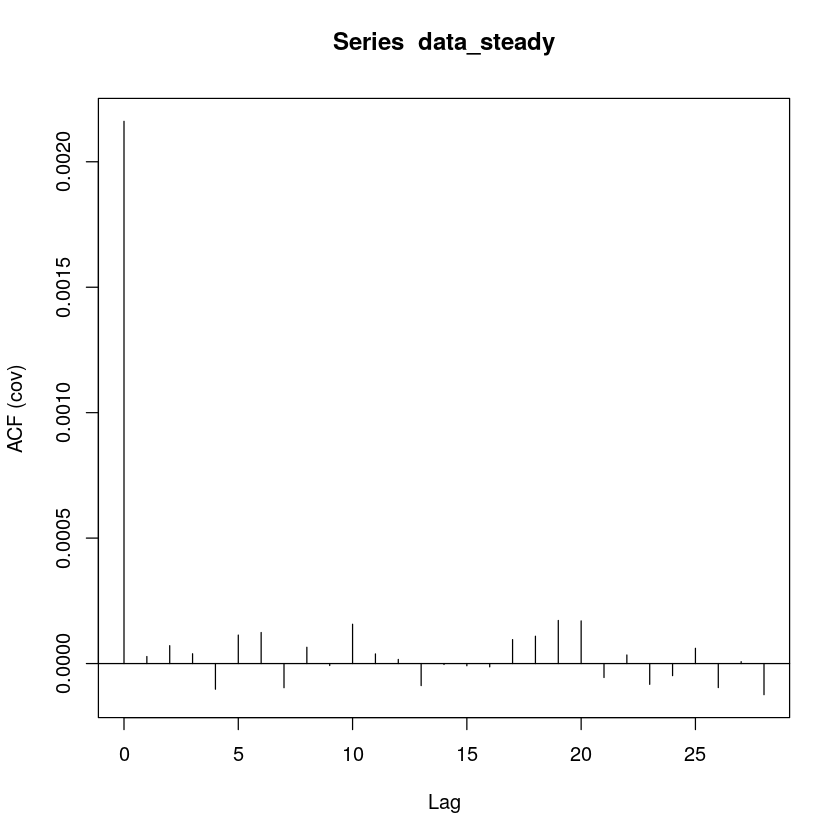

In [6]:
acf(data_steady, type='covariance')

## (b)

スペクトルを次の図に示す。

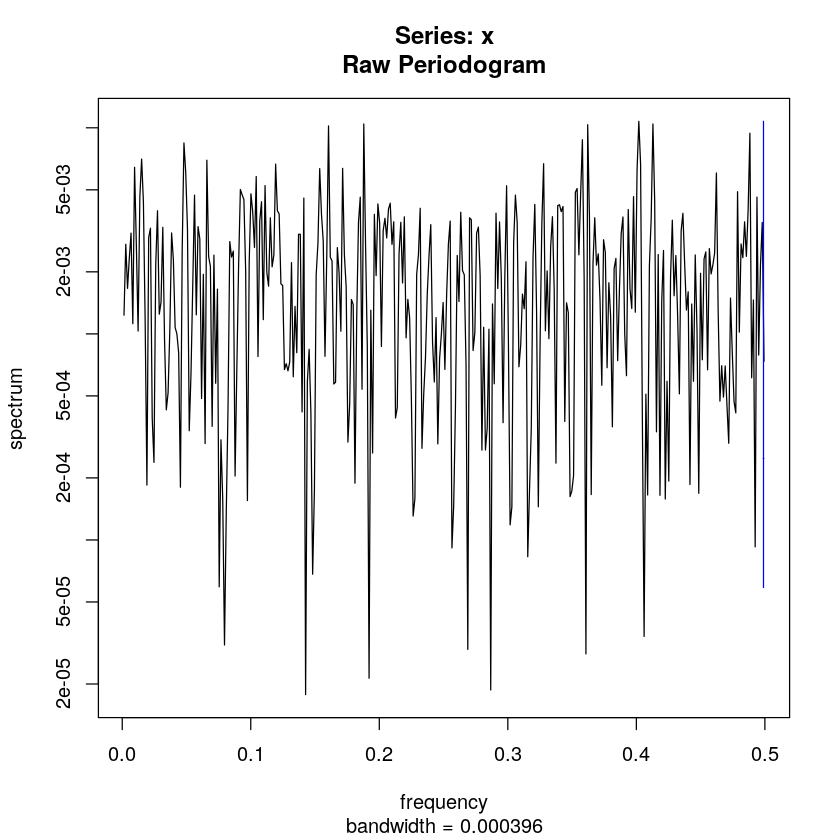

In [7]:
spectrum(data_steady)

## (c)

- まず、自己共分散関数のグラフに注目する。ラグが0でないところでは自己共分散関数の値が小さくなっており、この系列は時間的に相関がないことが伺える。実際、以下にプロットした自己相関係数のグラフをみてみると、ラグが0でないところでは自己相関係数は概ね点線の区間内にいる。いくつか点線をはみ出している部分もあるが、はみ出している大きさは小さく、時間的な相関は小さいことが予想される。なお、この点線は「ラグが0でないときの自己相関係数が全て互いに独立な標準正規分布に従う」と仮定したときの95％信頼区間である[1]。この系列は対数の1階差分であったから、「各日においてbitcoinの価格変動は独立である」と考えることができる。

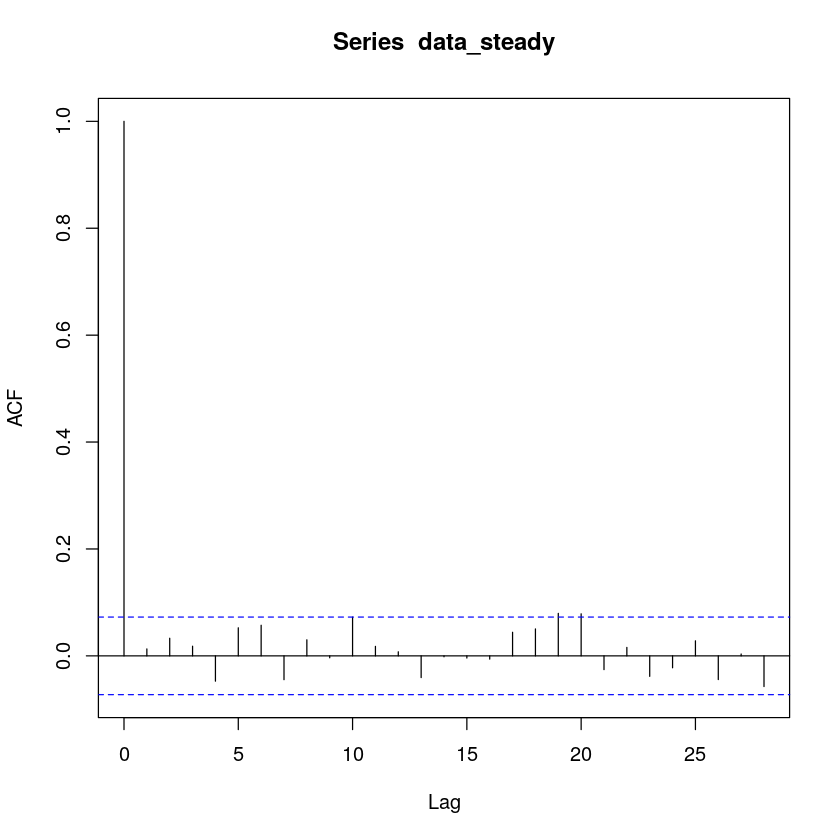

In [8]:
acf(data_steady)

- つぎに、スペクトルに注目する。このスペクトルからは、系列の周期性はみられない。また、スペクトルの形は講義資料第2回p.57のホワイトノイズのものに近いようにも見える。自己共分散関数の考察とあわせて、「各日でのbitcoinの価格変動は独立で、標準正規分布に従う」と考えることができる。

# 4

今後の分析案を以下に記す。
- 価格変動の外れ値を異常検知により抽出して、直近の出来事や価格変動との関連を探る。
- ほかの仮想通貨(rippleなど)にも同様の分析を行い、bitcoinと同様の傾向がみられるか確かめてみる。
- 通貨ペア間(bitcoin-USドルとbitcoin-日本円 など)や取引所間での価格差があればアービトラージにより利益を得ることができるので、価格差を事前に予測するために、取引所や通貨ペアごとに価格変動の傾向をみたり、それぞれの価格変動間の相関を探ったりする。

# 5

時間が足りず意味を考えることはできなかったが、対数の1階差分を取る際に、「対数の1階差分の1階差分の1階差分の…1階差分」といった具合に差分を繰り返しとると系列は平均定常に近づいていくことがわかった。以下に、差分を5重にとったものを示す。

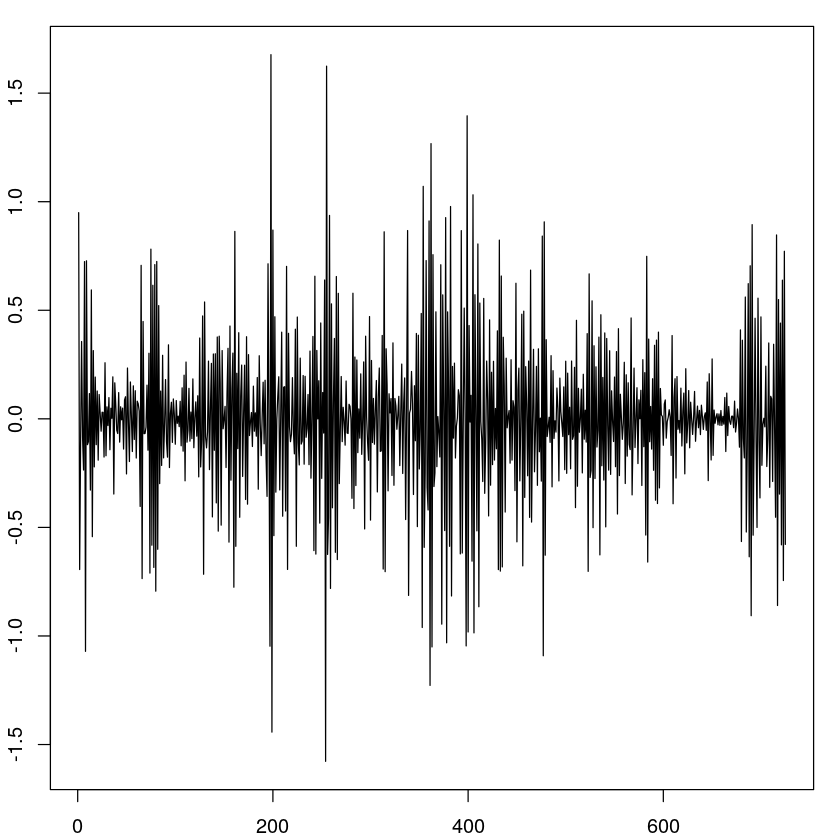

In [9]:
par(mar=c(2,2,1,1)+0.1)
plot(diff(log(data), lag=1, differences=5), type='l')

# 参考文献

[1] 萩原淳一郎ほか 『基礎からわかる時系列分析 ーRで実践するカルマンフィルタ・MCMC・粒子フィルター』、技術評論社、初版、p.20。